In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import explore
from jupyterthemes import jtplot
jtplot.style()

from wrangle_zillow import wrangle_zillow, scale_data, split_zillow

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [2]:
df = wrangle_zillow()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66858 entries, 0 to 77379
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   parcelid                    66858 non-null  int64  
 1   logerror                    66858 non-null  float64
 2   transactiondate             66858 non-null  object 
 3   bathrooms                   66858 non-null  float64
 4   bedrooms                    66858 non-null  float64
 5   buildingqualitytypeid       66858 non-null  float64
 6   square_feet                 66858 non-null  float64
 7   fips                        66858 non-null  float64
 8   latitude                    66858 non-null  float64
 9   longitude                   66858 non-null  float64
 10  lotsizesquarefeet           66858 non-null  float64
 11  rawcensustractandblock      66858 non-null  float64
 12  regionidcity                66858 non-null  float64
 13  regionidcounty              668

In [3]:
#duplicate
#(df.transactiondate != df.trans_date).any()

array([[<AxesSubplot:title={'center':'parcelid'}>,
        <AxesSubplot:title={'center':'logerror'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'buildingqualitytypeid'}>],
       [<AxesSubplot:title={'center':'square_feet'}>,
        <AxesSubplot:title={'center':'fips'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'lotsizesquarefeet'}>],
       [<AxesSubplot:title={'center':'rawcensustractandblock'}>,
        <AxesSubplot:title={'center':'regionidcity'}>,
        <AxesSubplot:title={'center':'regionidcounty'}>,
        <AxesSubplot:title={'center':'regionidzip'}>,
        <AxesSubplot:title={'center':'roomcnt'}>],
       [<AxesSubplot:title={'center':'unitcnt'}>,
        <AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'structuretaxvaluedollarcnt'}>,
        <Axe

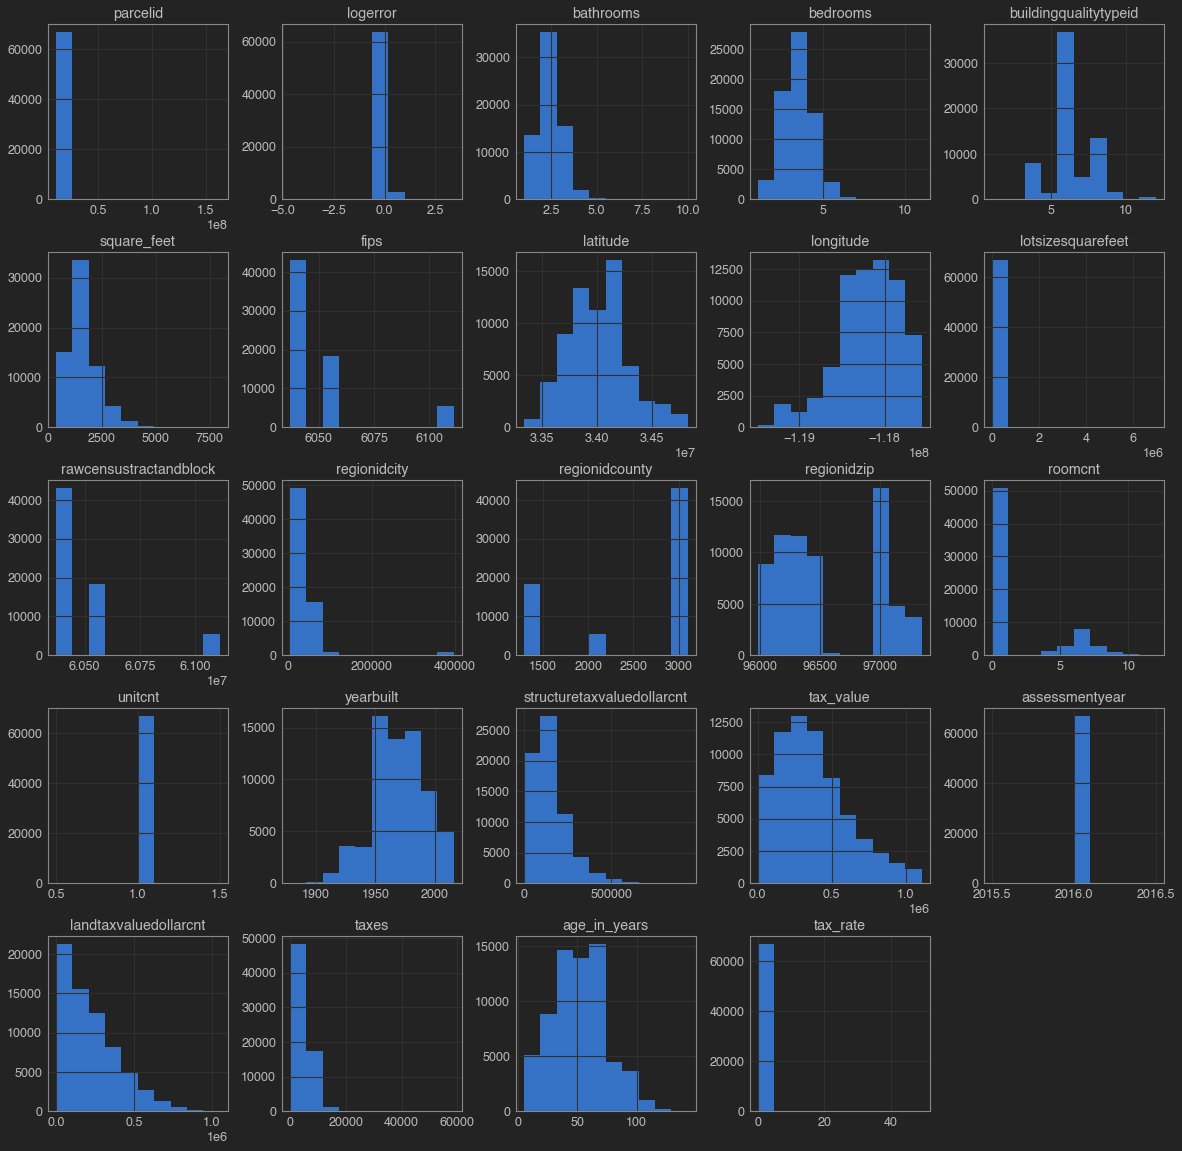

In [6]:
df.hist(figsize=[20,20])

In [7]:
df.bathrooms.value_counts()

2.0     29010
3.0     14818
1.0     12289
2.5      6306
4.0      1675
1.5      1351
3.5       686
5.0       363
4.5       254
6.0        56
5.5        28
7.0        12
6.5         4
8.0         2
7.5         2
10.0        1
9.0         1
Name: bathrooms, dtype: int64

In [8]:
df.logerror.describe()

count    66858.000000
mean         0.015853
std          0.160384
min         -4.655420
25%         -0.023532
50%          0.006056
75%          0.036439
max          3.394544
Name: logerror, dtype: float64

In [9]:
df['logerror_class'] = pd.qcut(df.logerror, q=4, labels=['q1','q2','q3','q4'])
df.logerror_class.head()

0    q3
1    q4
2    q2
3    q1
4    q3
Name: logerror_class, dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

In [10]:
df.logerror_class.value_counts()

q4    16715
q1    16715
q3    16714
q2    16714
Name: logerror_class, dtype: int64

In [11]:
df.Bathrooms_cat.value_counts()

2.0    29010
3.0    14818
1.0    12289
2.5     6306
4+      2398
1.5     1351
3.5      686
Name: Bathrooms_cat, dtype: int64

In [12]:
df.Bedrooms_cat.value_counts()

3.0    27825
2.0    18010
4+     17764
1.0     3259
Name: Bedrooms_cat, dtype: int64

In [13]:
df.yearbuilt.describe()

count    66858.000000
mean      1969.113943
std         22.527280
min       1878.000000
25%       1954.000000
50%       1970.000000
75%       1986.000000
max       2016.000000
Name: yearbuilt, dtype: float64

In [15]:
df['built_after_1970'] = df.yearbuilt.apply(lambda x: 1 if x >= 1970 else 0)
df.built_after_1970.head()

0    1
1    0
2    0
3    1
4    0
Name: built_after_1970, dtype: int64

In [5]:
cat_vars = ['fips']

quant_vars = ['square_feet',                         
              'lotsizesquarefeet',              
              'tax_value',
              'taxes',              
              'age_in_years',
              'tax_rate',
              'bedrooms',
              'bathrooms'
              ]

In [16]:
df.buildingqualitytypeid.value_counts()

6.0     36730
8.0     13579
4.0      8019
7.0      4894
9.0      1513
5.0      1468
11.0      414
3.0       143
10.0       66
12.0       24
1.0         5
2.0         3
Name: buildingqualitytypeid, dtype: int64

In [23]:
train, validate, test = split_zillow(df,stratify_by='logerror_class')

In [49]:
binary_vars = ['built_after_1970']
categorical_vars = ['logerror_class', 'county',
                    'Bedrooms_cat', 'Bathrooms_cat', 'buildingqualitytypeid']
quant_vars = ['square_feet',
              'lotsizesquarefeet',
              'tax_value',
              'taxes',
              'age_in_years',
              'tax_rate',
              'bedrooms',
              'bathrooms',
              'logerror',
              'latitude',
              'longitude']
categorical_target = 'logerror_class'
continuous_target = 'logerror'

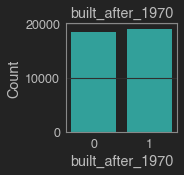

   built_after_1970  Count  Percent
1                 1  19053    50.89
0                 0  18387    49.11
_________________________________________________________________


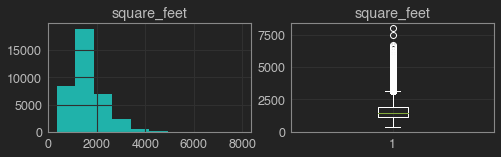

count    37440.000000
mean      1629.184295
std        686.010081
min        360.000000
25%       1154.000000
50%       1474.000000
75%       1941.000000
max       7970.000000
Name: square_feet, dtype: float64


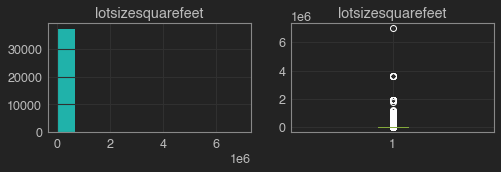

count    3.744000e+04
mean     2.672672e+04
std      9.839644e+04
min      2.360000e+02
25%      5.953000e+03
50%      7.313000e+03
75%      1.009525e+04
max      6.971010e+06
Name: lotsizesquarefeet, dtype: float64


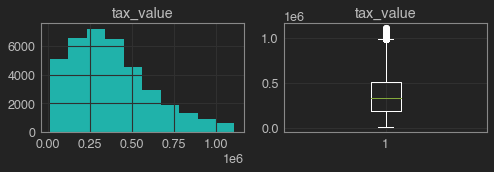

count    3.744000e+04
mean     3.774480e+05
std      2.371629e+05
min      1.050400e+04
25%      1.948040e+05
50%      3.380750e+05
75%      5.125880e+05
max      1.108401e+06
Name: tax_value, dtype: float64


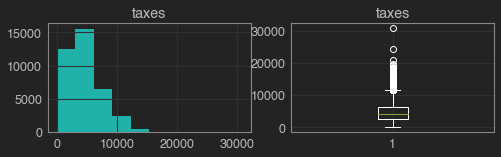

count    37440.000000
mean      4672.208813
std       2793.365685
min         51.260000
25%       2583.057500
50%       4194.735000
75%       6212.865000
max      30690.350000
Name: taxes, dtype: float64


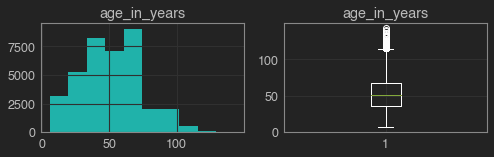

count    37440.000000
mean        51.900134
std         22.504569
min          6.000000
25%         35.000000
50%         51.000000
75%         67.000000
max        143.000000
Name: age_in_years, dtype: float64


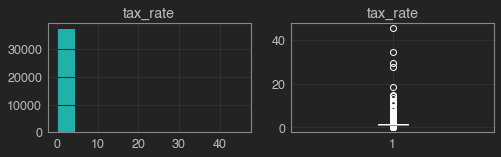

count    37440.000000
mean         1.317738
std          0.515646
min          0.020000
25%          1.170000
50%          1.230000
75%          1.350000
max         45.290000
Name: tax_rate, dtype: float64


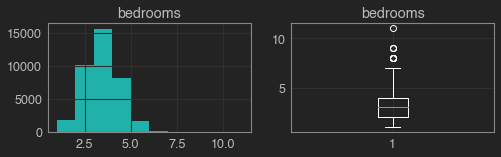

count    37440.000000
mean         2.960176
std          0.961916
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


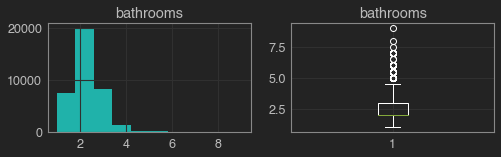

count    37440.000000
mean         2.177925
std          0.792402
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: bathrooms, dtype: float64


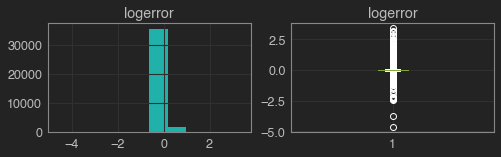

count    37440.000000
mean         0.016198
std          0.164283
min         -4.655420
25%         -0.023532
50%          0.006056
75%          0.036438
max          3.394544
Name: logerror, dtype: float64


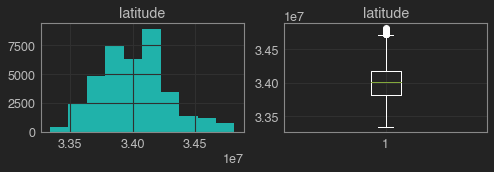

count    3.744000e+04
mean     3.401166e+07
std      2.686573e+05
min      3.333953e+07
25%      3.381615e+07
50%      3.401899e+07
75%      3.417992e+07
max      3.481240e+07
Name: latitude, dtype: float64


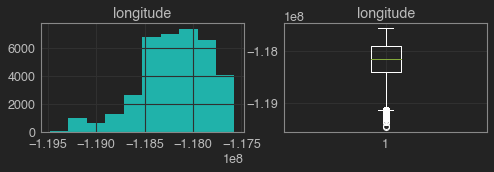

count    3.744000e+04
mean    -1.181940e+08
std      3.612338e+05
min     -1.194753e+08
25%     -1.184088e+08
50%     -1.181590e+08
75%     -1.179172e+08
max     -1.175723e+08
Name: longitude, dtype: float64


In [50]:
explore.explore_univariate(train, binary_vars, quant_vars)

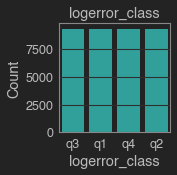

   logerror_class  Count  Percent
q4             q3   9360     25.0
q3             q1   9360     25.0
q2             q4   9360     25.0
q1             q2   9360     25.0
_________________________________________________________________


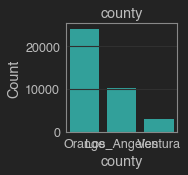

                  county  Count  Percent
Los_Angeles       Orange  24105    64.38
Orange       Los_Angeles  10248    27.37
Ventura          Ventura   3087     8.25
_________________________________________________________________


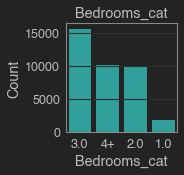

    Bedrooms_cat  Count  Percent
3.0            3  15581    41.62
2.0           4+  10055    26.86
4+             2   9991    26.69
1.0            1   1813     4.84
_________________________________________________________________


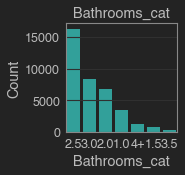

    Bathrooms_cat  Count  Percent
2.0           2.5  16328    43.61
3.0             3   8339    22.27
1.0             2   6776    18.10
2.5             1   3483     9.30
4+             4+   1362     3.64
1.5           1.5    750     2.00
3.5           3.5    402     1.07
_________________________________________________________________


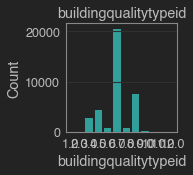

      buildingqualitytypeid  Count  Percent
6.0                     6.0  20535    54.85
8.0                     8.0   7619    20.35
4.0                     4.0   4477    11.96
7.0                     3.0   2757     7.36
5.0                     5.0    844     2.25
9.0                     7.0    832     2.22
11.0                    9.0    230     0.61
3.0                    10.0     81     0.22
10.0                   11.0     44     0.12
12.0                    1.0     17     0.05
1.0                    12.0      3     0.01
2.0                     2.0      1     0.00
_________________________________________________________________


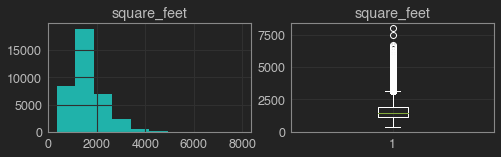

count    37440.000000
mean      1629.184295
std        686.010081
min        360.000000
25%       1154.000000
50%       1474.000000
75%       1941.000000
max       7970.000000
Name: square_feet, dtype: float64


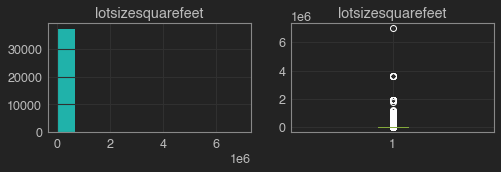

count    3.744000e+04
mean     2.672672e+04
std      9.839644e+04
min      2.360000e+02
25%      5.953000e+03
50%      7.313000e+03
75%      1.009525e+04
max      6.971010e+06
Name: lotsizesquarefeet, dtype: float64


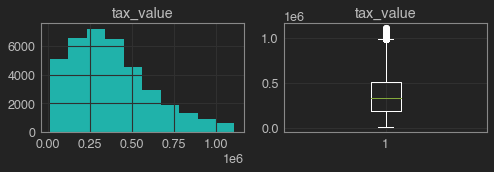

count    3.744000e+04
mean     3.774480e+05
std      2.371629e+05
min      1.050400e+04
25%      1.948040e+05
50%      3.380750e+05
75%      5.125880e+05
max      1.108401e+06
Name: tax_value, dtype: float64


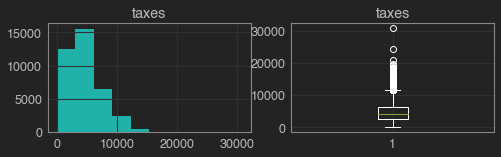

count    37440.000000
mean      4672.208813
std       2793.365685
min         51.260000
25%       2583.057500
50%       4194.735000
75%       6212.865000
max      30690.350000
Name: taxes, dtype: float64


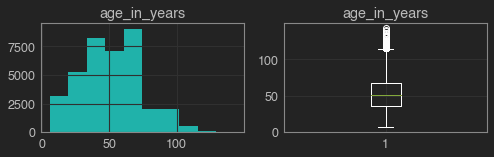

count    37440.000000
mean        51.900134
std         22.504569
min          6.000000
25%         35.000000
50%         51.000000
75%         67.000000
max        143.000000
Name: age_in_years, dtype: float64


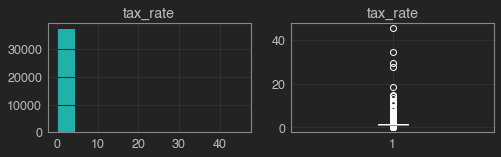

count    37440.000000
mean         1.317738
std          0.515646
min          0.020000
25%          1.170000
50%          1.230000
75%          1.350000
max         45.290000
Name: tax_rate, dtype: float64


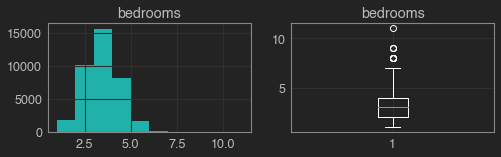

count    37440.000000
mean         2.960176
std          0.961916
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


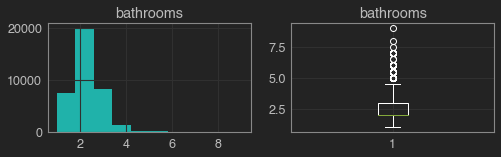

count    37440.000000
mean         2.177925
std          0.792402
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: bathrooms, dtype: float64


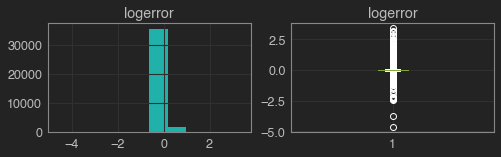

count    37440.000000
mean         0.016198
std          0.164283
min         -4.655420
25%         -0.023532
50%          0.006056
75%          0.036438
max          3.394544
Name: logerror, dtype: float64


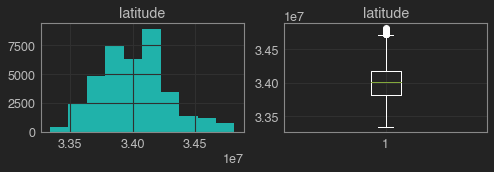

count    3.744000e+04
mean     3.401166e+07
std      2.686573e+05
min      3.333953e+07
25%      3.381615e+07
50%      3.401899e+07
75%      3.417992e+07
max      3.481240e+07
Name: latitude, dtype: float64


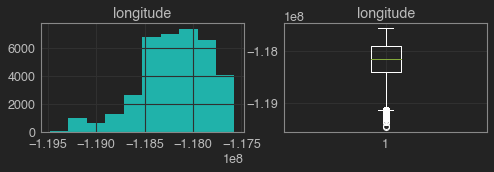

count    3.744000e+04
mean    -1.181940e+08
std      3.612338e+05
min     -1.194753e+08
25%     -1.184088e+08
50%     -1.181590e+08
75%     -1.179172e+08
max     -1.175723e+08
Name: longitude, dtype: float64


In [51]:
explore.explore_univariate(train, categorical_vars, quant_vars)

<AxesSubplot:>

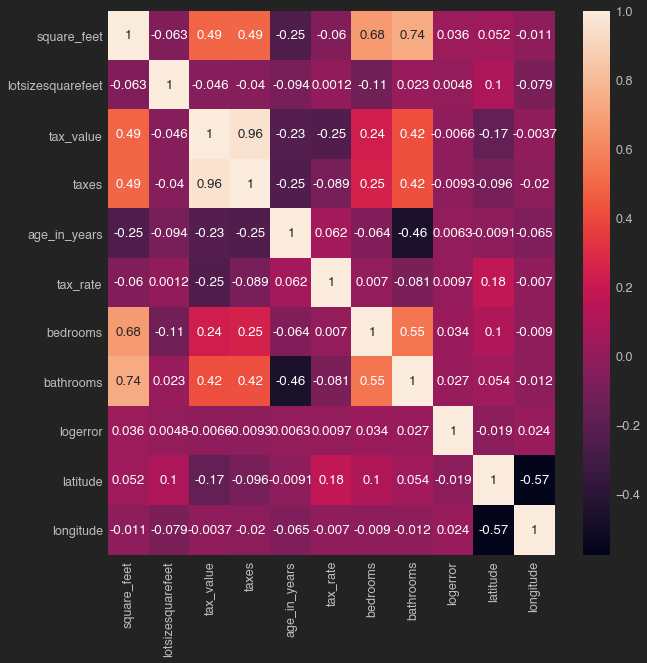

In [130]:
plt.figure(figsize=(10, 10))
sns.heatmap(train[quant_vars].corr(), annot=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

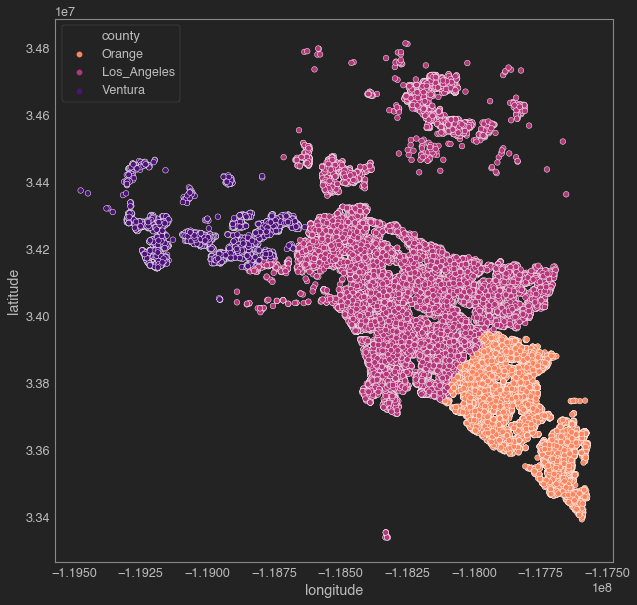

In [62]:
jtplot.style(grid=False)
plt.figure(figsize=[10,10])
sns.scatterplot(y=train.latitude , x=train.longitude, hue=train.county, palette='magma_r')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

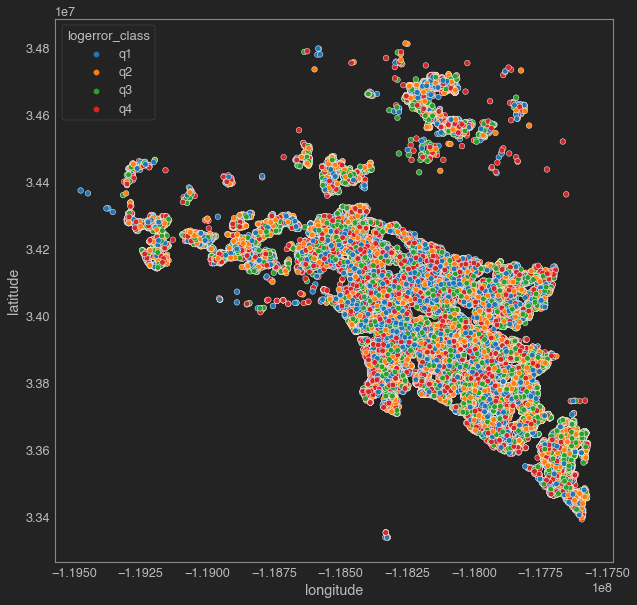

In [64]:
jtplot.style(grid=False)
plt.figure(figsize=[10,10])
sns.scatterplot(y=train.latitude , x=train.longitude, hue=train.logerror_class, palette='tab10')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

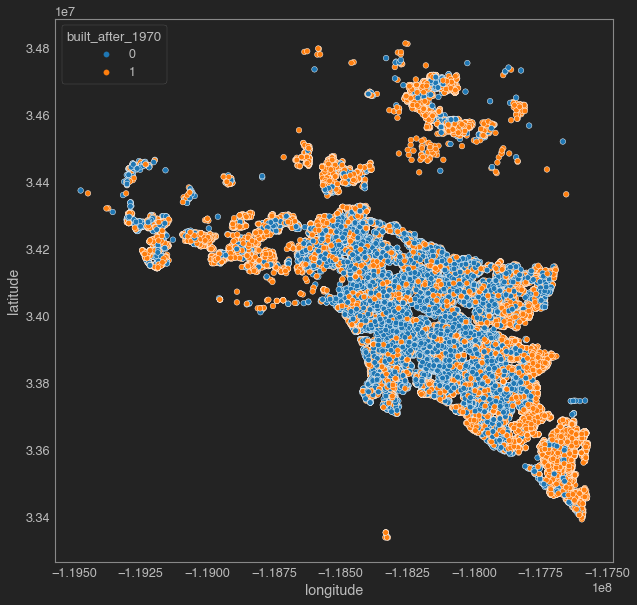

In [65]:
jtplot.style(grid=False)
plt.figure(figsize=[10,10])
sns.scatterplot(y=train.latitude , x=train.longitude, hue=train.built_after_1970, palette='tab10')

In [67]:
train['sqft_class'] = pd.qcut(df.square_feet, q=4, labels=['q1','q2','q3','q4'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

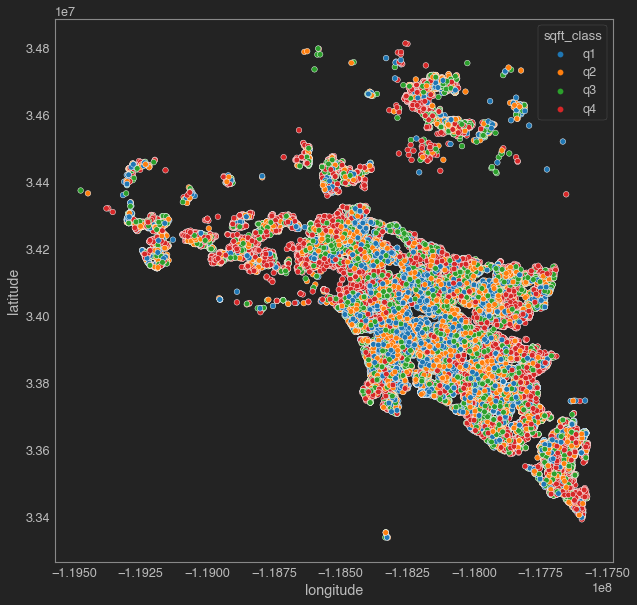

In [68]:
plt.figure(figsize=[10,10])
sns.scatterplot(y=train.latitude , x=train.longitude, hue=train.sqft_class, palette='tab10')

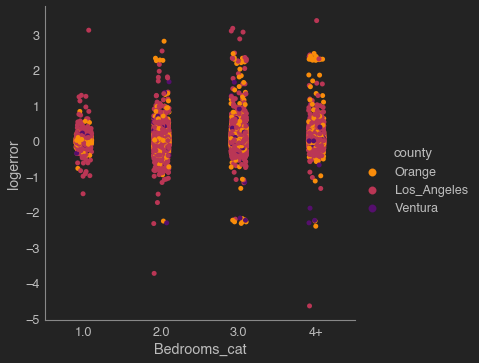

In [85]:
sns.catplot(data=train, x='Bedrooms_cat',y='logerror', hue='county', palette='inferno_r',order=[1.0,2.0,3.0,'4+'])

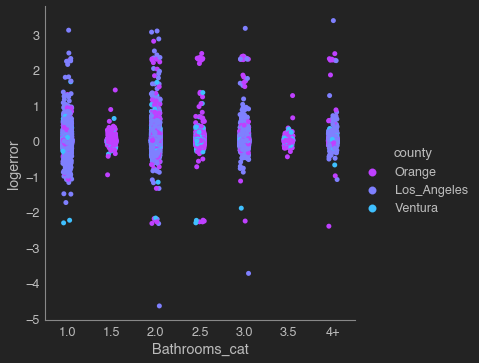

In [90]:
sns.catplot(data=train, x='Bathrooms_cat',y='logerror', palette='cool_r', order=[1.0,1.5,2.0,2.5,3.0,3.5,'4+'], hue='county')


<AxesSubplot:xlabel='square_feet', ylabel='logerror'>

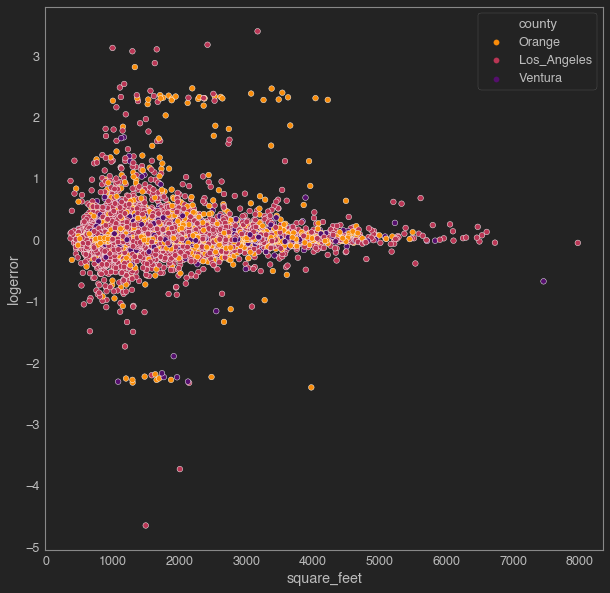

In [98]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='square_feet',y='logerror', hue='county', palette='inferno_r')

<AxesSubplot:xlabel='square_feet', ylabel='logerror'>

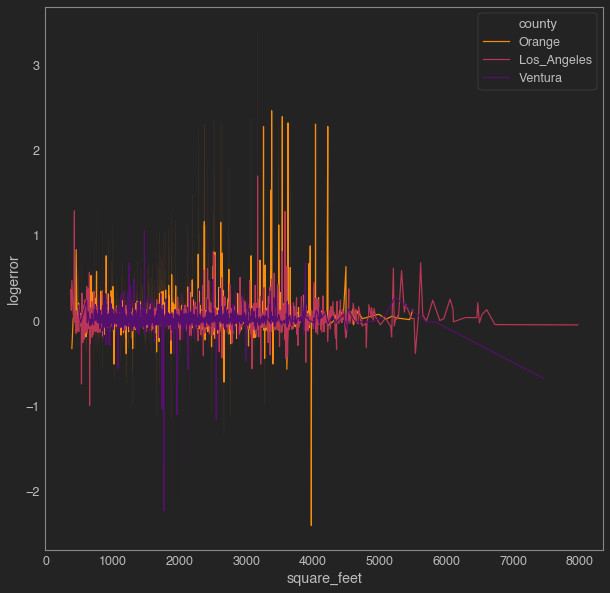

In [129]:
plt.figure(figsize=[10,10])
sns.lineplot(data=train, x='square_feet',y='logerror', hue='county', palette='inferno_r')

<AxesSubplot:xlabel='tax_value', ylabel='logerror'>

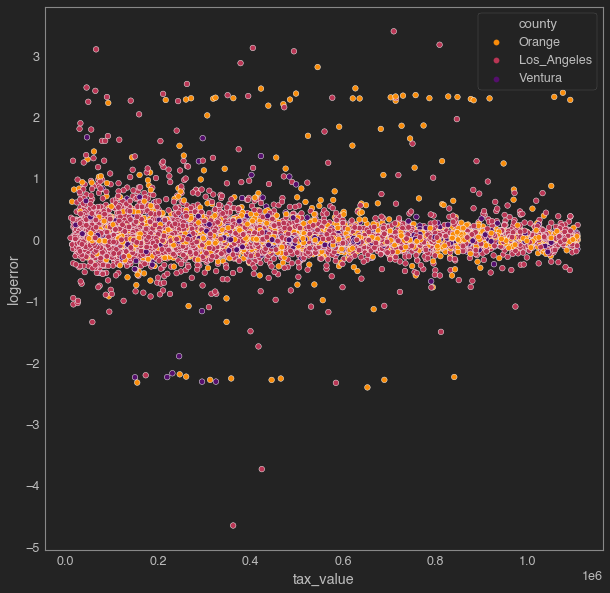

In [104]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='tax_value',y='logerror', hue='county', palette='inferno_r')

<AxesSubplot:xlabel='age_in_years', ylabel='logerror'>

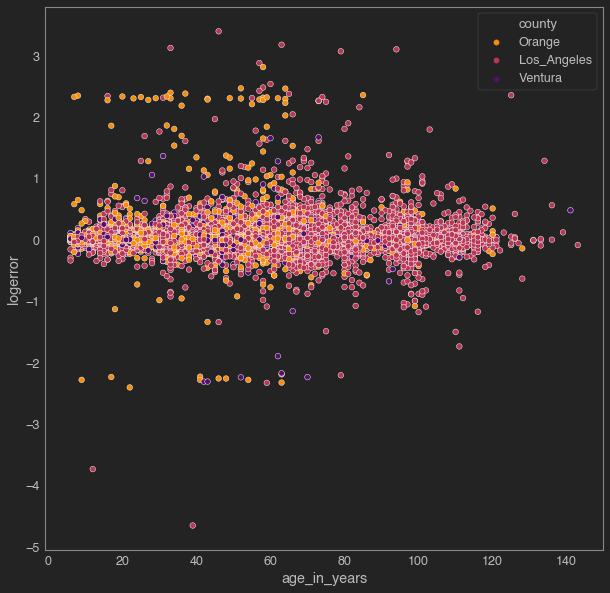

In [100]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='age_in_years',y='logerror', hue='county', palette='inferno_r')

<AxesSubplot:xlabel='bedrooms', ylabel='logerror'>

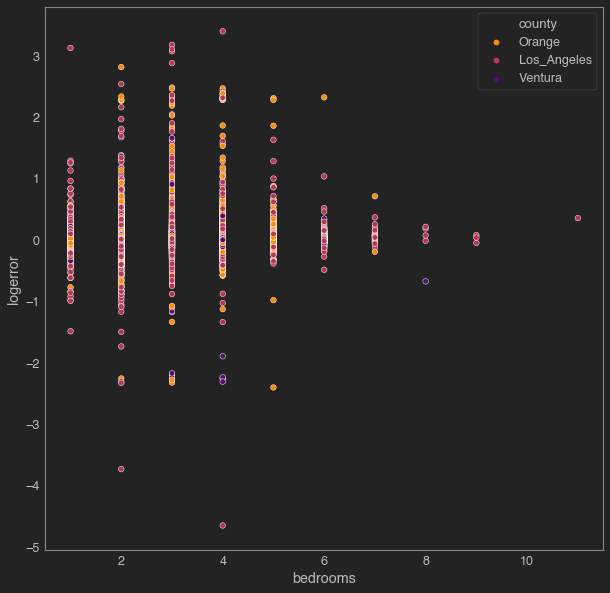

In [112]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='bedrooms',y='logerror', hue='county', palette='inferno_r')

<AxesSubplot:xlabel='bathrooms', ylabel='logerror'>

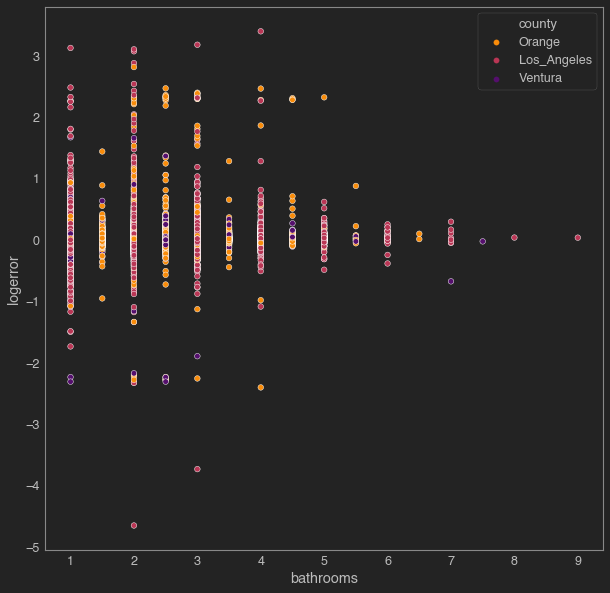

In [113]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='bathrooms',y='logerror', hue='county', palette='inferno_r')

<AxesSubplot:xlabel='tax_rate', ylabel='logerror'>

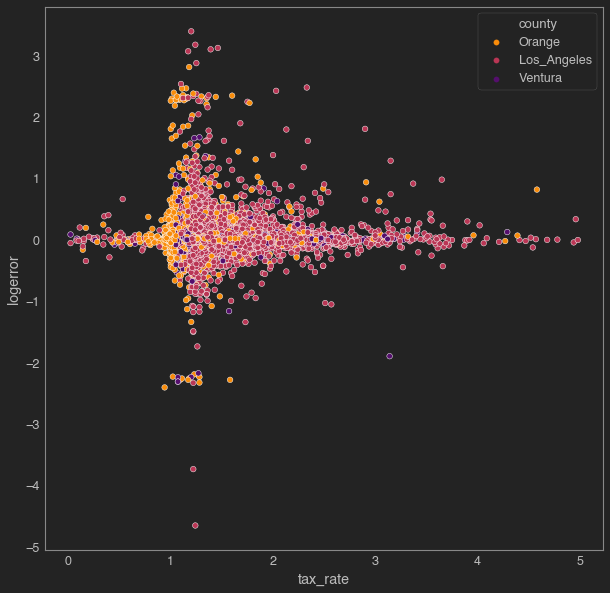

In [116]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train[train.tax_rate < 5.0], x='tax_rate',y='logerror', hue='county', palette='inferno_r')

<Figure size 720x720 with 0 Axes>

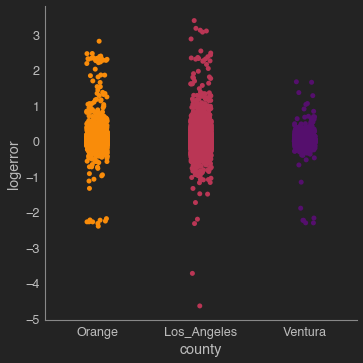

In [102]:
plt.figure(figsize=[10,10])
sns.catplot(data=train, x='county',y='logerror', hue='county', palette='inferno_r')

<Figure size 720x720 with 0 Axes>

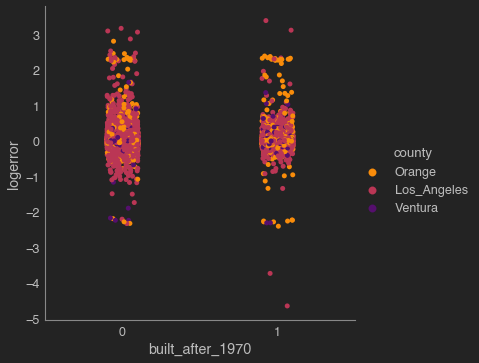

In [103]:
plt.figure(figsize=[10,10])
sns.catplot(data=train, x='built_after_1970',y='logerror', hue='county', palette='inferno_r')

<Figure size 1080x720 with 0 Axes>

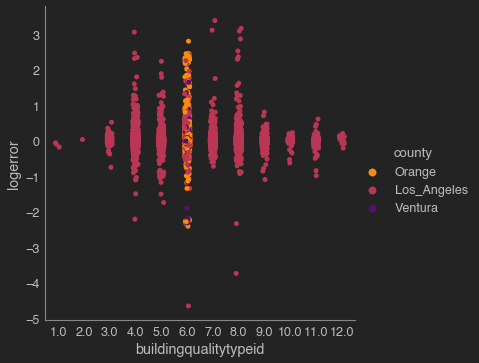

In [111]:
plt.figure(figsize=[15,10])
sns.catplot(data=train, x='buildingqualitytypeid',y='logerror', hue='county', palette='inferno_r')

In [120]:

train['transactiondate'] = train.transactiondate.astype('str')
train['transaction_month'] = train.transactiondate.str.split('-',expand=True)[1]

<AxesSubplot:xlabel='transaction_month', ylabel='logerror'>

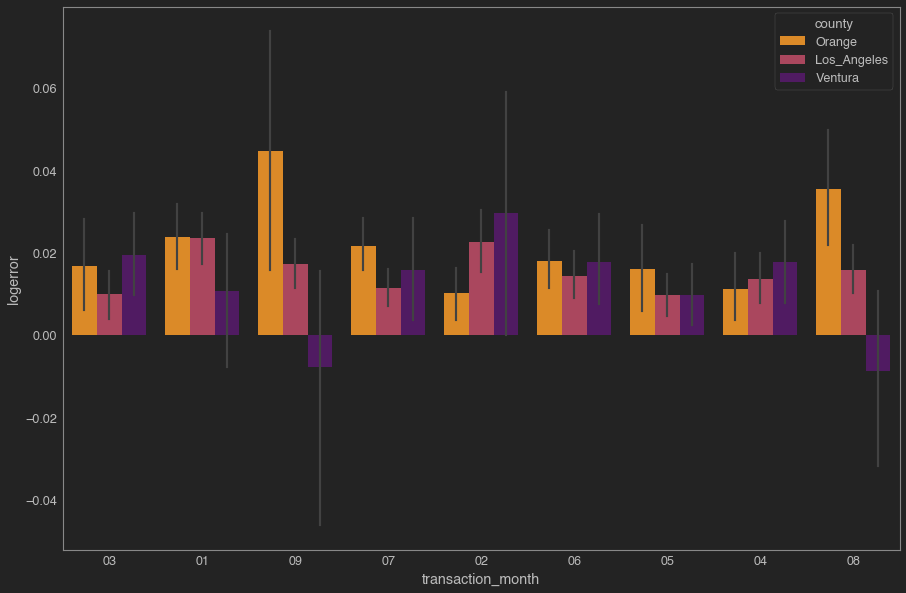

In [126]:
plt.figure(figsize=[15,10])
sns.barplot(data=train, x='transaction_month',y='logerror', hue='county', palette='inferno_r')

In [123]:
train.transaction_month.value_counts()

06    5544
05    5022
08    4825
07    4586
03    4436
04    4279
01    3389
02    3073
09    2286
Name: transaction_month, dtype: int64